**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)
np.random.seed(218)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [3]:
x = np.linspace(0,100,15) #exogenous 
m = 1.5 # slope
c = 0 #intercept
y = line(m,x,c,errors) #endogenous

Text(0,0.5,'Endogenous')

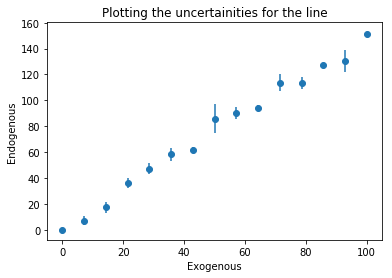

In [4]:
yerr = y - (m*x + c)
plt.errorbar(x,y,yerr,fmt='o')
plt.title('Plotting the uncertainities for the line')
plt.xlabel('Exogenous')
plt.ylabel('Endogenous')

Figure 1: The plot shows the errorbars(uncertainity) associated with each data-point for the generated line with slope 1.5 and y-intercept 0.

In [5]:
yerr

array([  0.        ,  -3.59792668,  -4.02059931,   4.1069074 ,
         4.41159623,   4.73671972,  -2.24541021,  11.01888503,
         4.71771174,  -2.10812457,   6.47267149,  -4.62769887,
        -1.11663328,  -8.68339601,   1.30896248])

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [6]:
y

array([   0.        ,    7.11635904,   17.40797211,   36.24976454,
         47.26873908,   58.30814829,   62.04030407,   86.01888503,
         90.43199745,   94.32044686,  113.61552863,  113.22944399,
        127.45479529,  130.60231827,  151.30896248])

In [7]:
x

array([   0.        ,    7.14285714,   14.28571429,   21.42857143,
         28.57142857,   35.71428571,   42.85714286,   50.        ,
         57.14285714,   64.28571429,   71.42857143,   78.57142857,
         85.71428571,   92.85714286,  100.        ])

In [8]:
sm.add_constant(x)

array([[   1.        ,    0.        ],
       [   1.        ,    7.14285714],
       [   1.        ,   14.28571429],
       [   1.        ,   21.42857143],
       [   1.        ,   28.57142857],
       [   1.        ,   35.71428571],
       [   1.        ,   42.85714286],
       [   1.        ,   50.        ],
       [   1.        ,   57.14285714],
       [   1.        ,   64.28571429],
       [   1.        ,   71.42857143],
       [   1.        ,   78.57142857],
       [   1.        ,   85.71428571],
       [   1.        ,   92.85714286],
       [   1.        ,  100.        ]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [9]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4296.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.00e-19
Time:                        23:32:00   Log-Likelihood:                -45.560
No. Observations:                  15   AIC:                             93.12
Df Residuals:                      14   BIC:                             93.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5042      0.023     65.546      0.000         1.455     1.553
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.235
Skew:                           0.140   Prob(JB):                        0.889
Kurtosis:                       2.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#THE RIGHT WAY
smfit1 = smf.OLS(y, sm.add_constant(x)).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1100.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.98e-14
Time:                        23:32:00   Log-Likelihood:                -45.307
No. Observations:                  15   AIC:                             94.61
Df Residuals:                      13   BIC:                             96.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7494      2.620      0.668      0.516        -3.910     7.409
x1             1.4788      0.045     33.170      0.000         1.383     1.575
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.459
Skew:                           0.253   Prob(JB):                        0.795
Kurtosis:                       2.308   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As seen from the summaries, the addition of a constant to the equation of the line while fitting the data-points of the original line doesn't give a better fit for this case which is evident from its lower R-squared value than the model without a constant.

# 4. plot the data (as points) and both statsmodels fits

Text(0,0.5,'y')

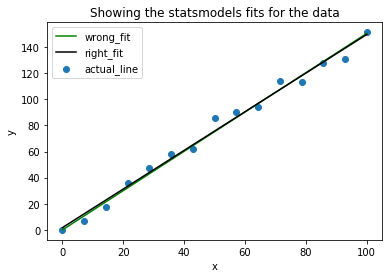

In [11]:
plt.scatter(x,y,label='actual_line')
plt.plot(x,x*smfit.params[0],c='green',label='wrong_fit')
plt.plot(x,x*smfit1.params[1]+smfit1.params[0],c='black',label='right_fit')
plt.legend()
plt.title('Showing the statsmodels fits for the data')
plt.xlabel('x')
plt.ylabel('y')

Figure 2: The plot shows the data-points for the actual line and along with that the 2 statsmodels fits for the line. One of it has a constant added to it(the right fit) and one doesn't and though no visible difference is there in the graph for them, we can notice from the r-squared value of the models that the right fit is the better fit.

In [12]:
smfit1.params

array([ 1.74937804,  1.47884399])

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [13]:
x = np.linspace(0,100,20) #exogenous 
m = 1.5 # slope
c = 120*m #intercept
y = line(m,x,c,errors) #endogenous

Text(0,0.5,'Endogenous')

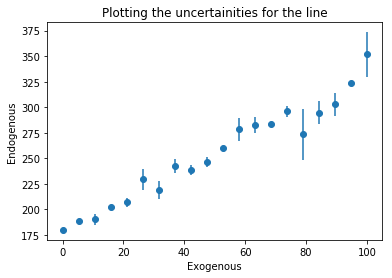

In [14]:
yerr = y - (m*x + c)
plt.errorbar(x,y,yerr,fmt='o')
plt.title('Plotting the uncertainities for the line')
plt.xlabel('Exogenous')
plt.ylabel('Endogenous')

Figure 3: The plot shows the errorbars(uncertainity) associated with each data-point for the generated line with slope 1.5 and y-intercept 180.

In [15]:
yerr

array([  0.        ,   0.69781505,  -5.50371066,  -1.32376816,
        -4.73607381,   9.95387398,  -8.7589146 ,   7.07697854,
        -4.59636225,  -4.92979348,   1.58656981,  11.54780611,
         8.01877124,   1.33084881,   5.46153447, -25.07487045,
       -11.58790319, -11.36499269,   1.57589816,  21.66549214])

# 6. repeat step 3

In [16]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     126.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.49e-10
Time:                        23:32:00   Log-Likelihood:                -119.12
No. Observations:                  20   AIC:                             240.2
Df Residuals:                      19   BIC:                             241.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.1270      0.366     11.263      0.000         3.360     4.894
==============================================================================
Omnibus:                        3.459   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                1.309
Skew:                          -0.017   Prob(JB):                        0.520
Kurtosis:                       1.747   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#THE RIGHT WAY
smfit1 = smf.OLS(y, sm.add_constant(x)).fit()
smfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     394.7
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.08e-13
Time:                        23:32:00   Log-Likelihood:                -74.002
No. Observations:                  20   AIC:                             152.0
Df Residuals:                      18   BIC:                             154.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        179.0423      4.446     40.267      0.000       169.701   188.384
x1             1.5102      0.076     19.866      0.000         1.350     1.670
==============================================================================
Omnibus:                        2.159   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                0.694
Skew:                          -0.271   Prob(JB):                        0.707
Kurtosis:                       3.734   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### It is much more clear from these models that the right fit is a much better fit for the line than the wrong fit because the R-squared for the right fit is 0.956 while for the wrong fit , it is just 0.870.

Text(0,0.5,'y')

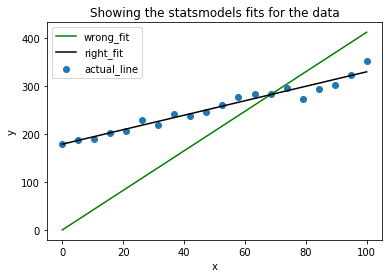

In [18]:
plt.scatter(x,y,label='actual_line')
plt.plot(x,x*smfit.params[0],c='green',label='wrong_fit')
plt.plot(x,x*smfit1.params[1]+smfit1.params[0],c='black',label='right_fit')
plt.legend()
plt.title('Showing the statsmodels fits for the data')
plt.xlabel('x')
plt.ylabel('y')

Figure 4: The graph shows how adding a constant fits the data so much better and how bad the wrong fit is.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [19]:
err = np.abs(y - (m*x + c)) # getting absolute values of the errors

In [20]:
err

array([  0.        ,   0.69781505,   5.50371066,   1.32376816,
         4.73607381,   9.95387398,   8.7589146 ,   7.07697854,
         4.59636225,   4.92979348,   1.58656981,  11.54780611,
         8.01877124,   1.33084881,   5.46153447,  25.07487045,
        11.58790319,  11.36499269,   1.57589816,  21.66549214])

In [21]:
err = err+0.1 # Displacing the errors by 0.1 so that none have the value 0 because 1/0 is infinity

In [22]:
err#The impact will not be that big especially when you inverse it

array([  0.1       ,   0.79781505,   5.60371066,   1.42376816,
         4.83607381,  10.05387398,   8.8589146 ,   7.17697854,
         4.69636225,   5.02979348,   1.68656981,  11.64780611,
         8.11877124,   1.43084881,   5.56153447,  25.17487045,
        11.68790319,  11.46499269,   1.67589816,  21.76549214])

In [23]:
wlsfit = smf.WLS(y,sm.add_constant(x),weights=1/err).fit() # The weights are the inverse of the uncertainity in the data
wlsfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3420.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.49e-22
Time:                        23:32:00   Log-Likelihood:                -62.886
No. Observations:                  20   AIC:                             129.8
Df Residuals:                      18   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        179.8812      0.815    220.764      0.000       178.169   181.593
x1             1.5112      0.026     58.484      0.000         1.457     1.565
==============================================================================
Omnibus:                        2.357   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                1.107
Skew:                          -0.039   Prob(JB):                        0.575
Kurtosis:                       1.850   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
wlsfit1 = smf.WLS(y,sm.add_constant(x),weights=1/errors(y)).fit() # Using the errors function
wlsfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.18e-14
Time:                        23:32:00   Log-Likelihood:                -73.350
No. Observations:                  20   AIC:                             150.7
Df Residuals:                      18   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        179.1120      4.118     43.491      0.000       170.460   187.764
x1             1.5054      0.073     20.520      0.000         1.351     1.660
==============================================================================
Omnibus:                        1.956   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                0.609
Skew:                          -0.306   Prob(JB):                        0.737
Kurtosis:                       3.596   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'y')

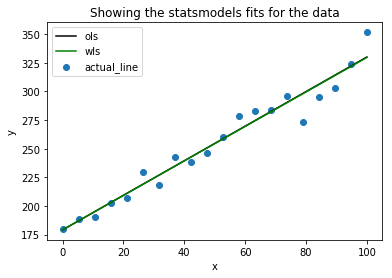

In [25]:
plt.scatter(x,y,label='actual_line')
plt.plot(x,x*smfit1.params[1]+smfit1.params[0],c='black',label='ols')
plt.plot(x,x*wlsfit1.params[1]+wlsfit1.params[0],c='green',label='wls')
plt.legend()
plt.title('Showing the statsmodels fits for the data')
plt.xlabel('x')
plt.ylabel('y')

Figure 5: This plot shows the result of the wls as compared ols and they both seem to fit the data almost perfectly. That is, no significant difference is noticable between the 2 from the graph for this line.

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

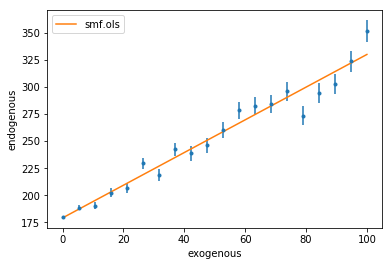

In [26]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.zeros(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

Figure 6: The plot shows how we can make a model based on a formula using the statsmodels.formula.api toolkit of Python.